# ESS for iphlppl

## Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [37]:
df = pd.read_csv(r"..\Data\csv\ESS-Data-Wizard-subset-2023-05-19.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21706 entries, 0 to 21705
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      21706 non-null  object 
 1   essround  21706 non-null  int64  
 2   edition   21706 non-null  float64
 3   proddate  21706 non-null  object 
 4   idno      21706 non-null  int64  
 5   cntry     21706 non-null  object 
 6   dweight   21706 non-null  float64
 7   pspwght   21706 non-null  float64
 8   pweight   21706 non-null  float64
 9   anweight  9967 non-null   float64
 10  prob      9967 non-null   float64
 11  stratum   9967 non-null   float64
 12  psu       9967 non-null   float64
 13  impenv    21706 non-null  int64  
 14  imprich   21706 non-null  int64  
 15  ipeqopt   21706 non-null  int64  
 16  iphlppl   21706 non-null  int64  
 17  ipstrgv   21706 non-null  int64  
dtypes: float64(8), int64(7), object(3)
memory usage: 3.0+ MB


In [39]:
scala_values = {
    1: "Very much like me",
    2: "Like me",
    3: "Somewhat like me",
    4: "A little like me",
    5: "Not like me",
    6: "Not like me at all"}

In [40]:
df.iloc[:,13:] = df.iloc[:,13:].replace([7,8,9], np.nan)

In [41]:
df.groupby("cntry")["iphlppl"].value_counts()

cntry  iphlppl
BG     2.0        1618
       3.0        1126
       1.0         860
       4.0         337
       5.0         131
       6.0          46
DE     2.0        2481
       1.0        1375
       3.0         895
       4.0         225
       5.0          85
       6.0          12
ES     2.0        1953
       1.0        1719
       3.0         416
       4.0         107
       5.0          11
       6.0           5
GB     2.0        2078
       1.0        1481
       3.0         613
       4.0         265
       5.0          55
       6.0           7
SE     2.0        1339
       1.0         745
       3.0         696
       4.0         255
       5.0          38
       6.0           2
Name: iphlppl, dtype: int64

## Boxplot

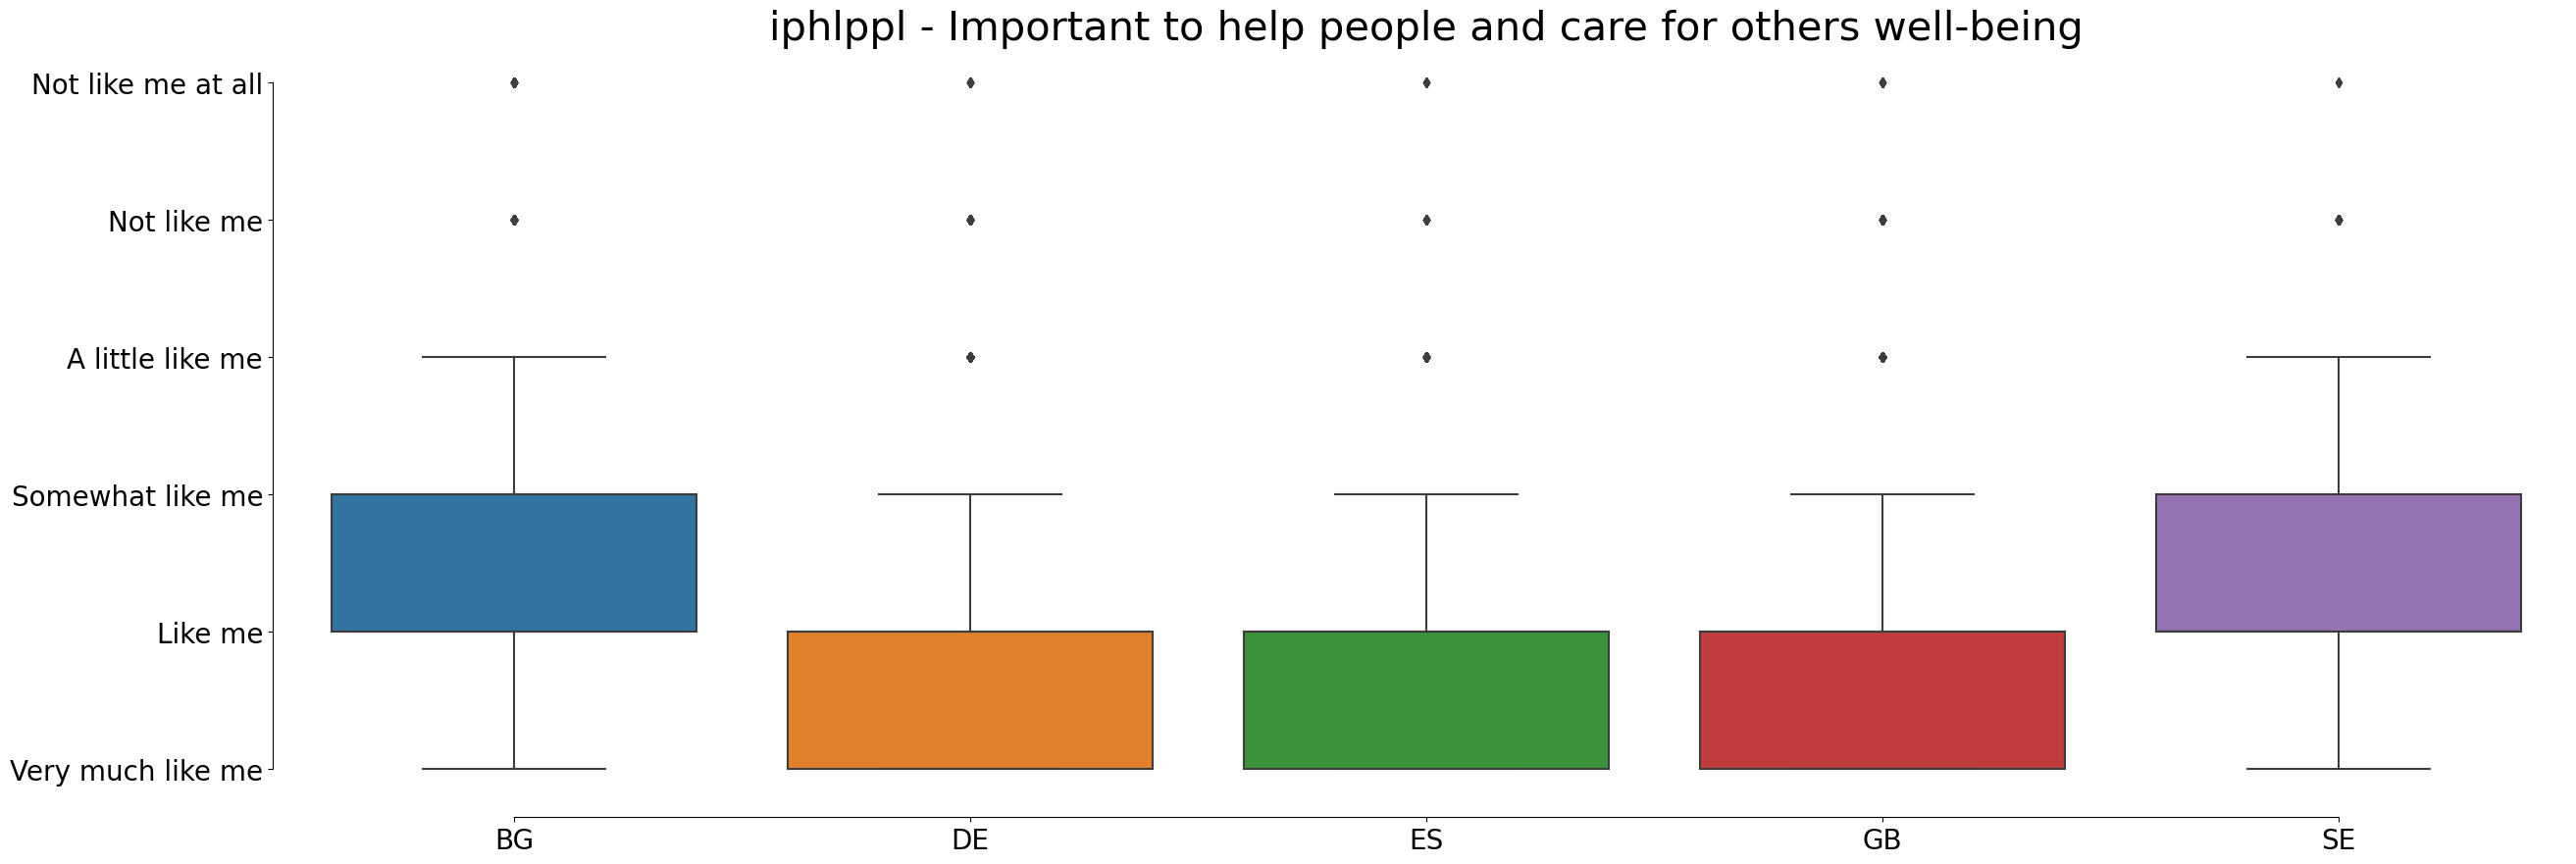

In [42]:
fig, ax = plt.subplots(figsize=(30, 10))

sns.boxplot(x='cntry', y='iphlppl', data=df)
sns.despine(offset=10, trim=True) #remove frame
plt.title("iphlppl - Important to help people and care for others well-being", fontsize=30)

ax.set_yticklabels(scala_values.values(), fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)

ax.set(xlabel=None, ylabel=None)

plt.show()

## Boxplot before after

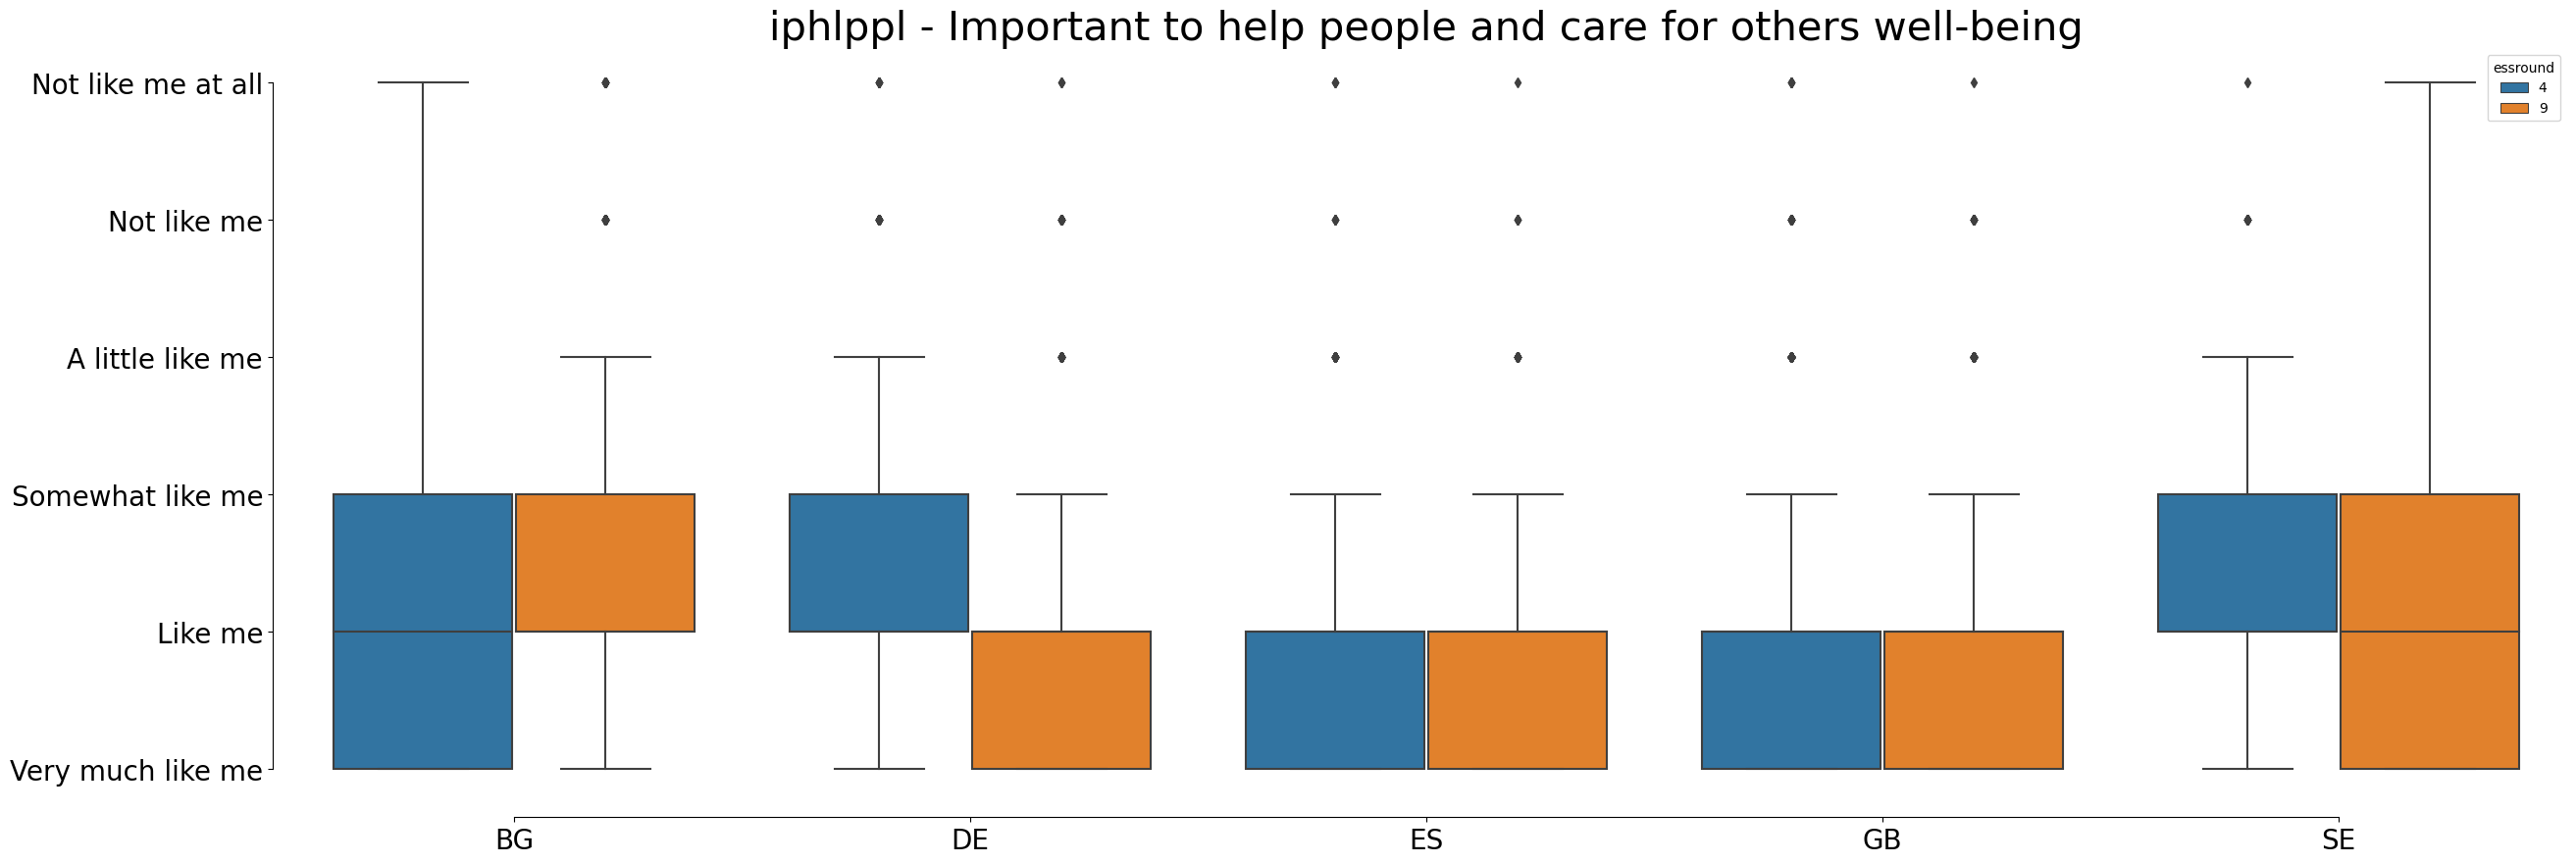

In [43]:
fig, ax = plt.subplots(figsize=(30, 10))

sns.boxplot(x='cntry', y='iphlppl', hue = "essround", data=df)
sns.despine(offset=10, trim=True) #remove frame
plt.title("iphlppl - Important to help people and care for others well-being", fontsize=30)

ax.set_yticklabels(scala_values.values(), fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)

ax.set(xlabel=None, ylabel=None)

plt.show()

## Barplot

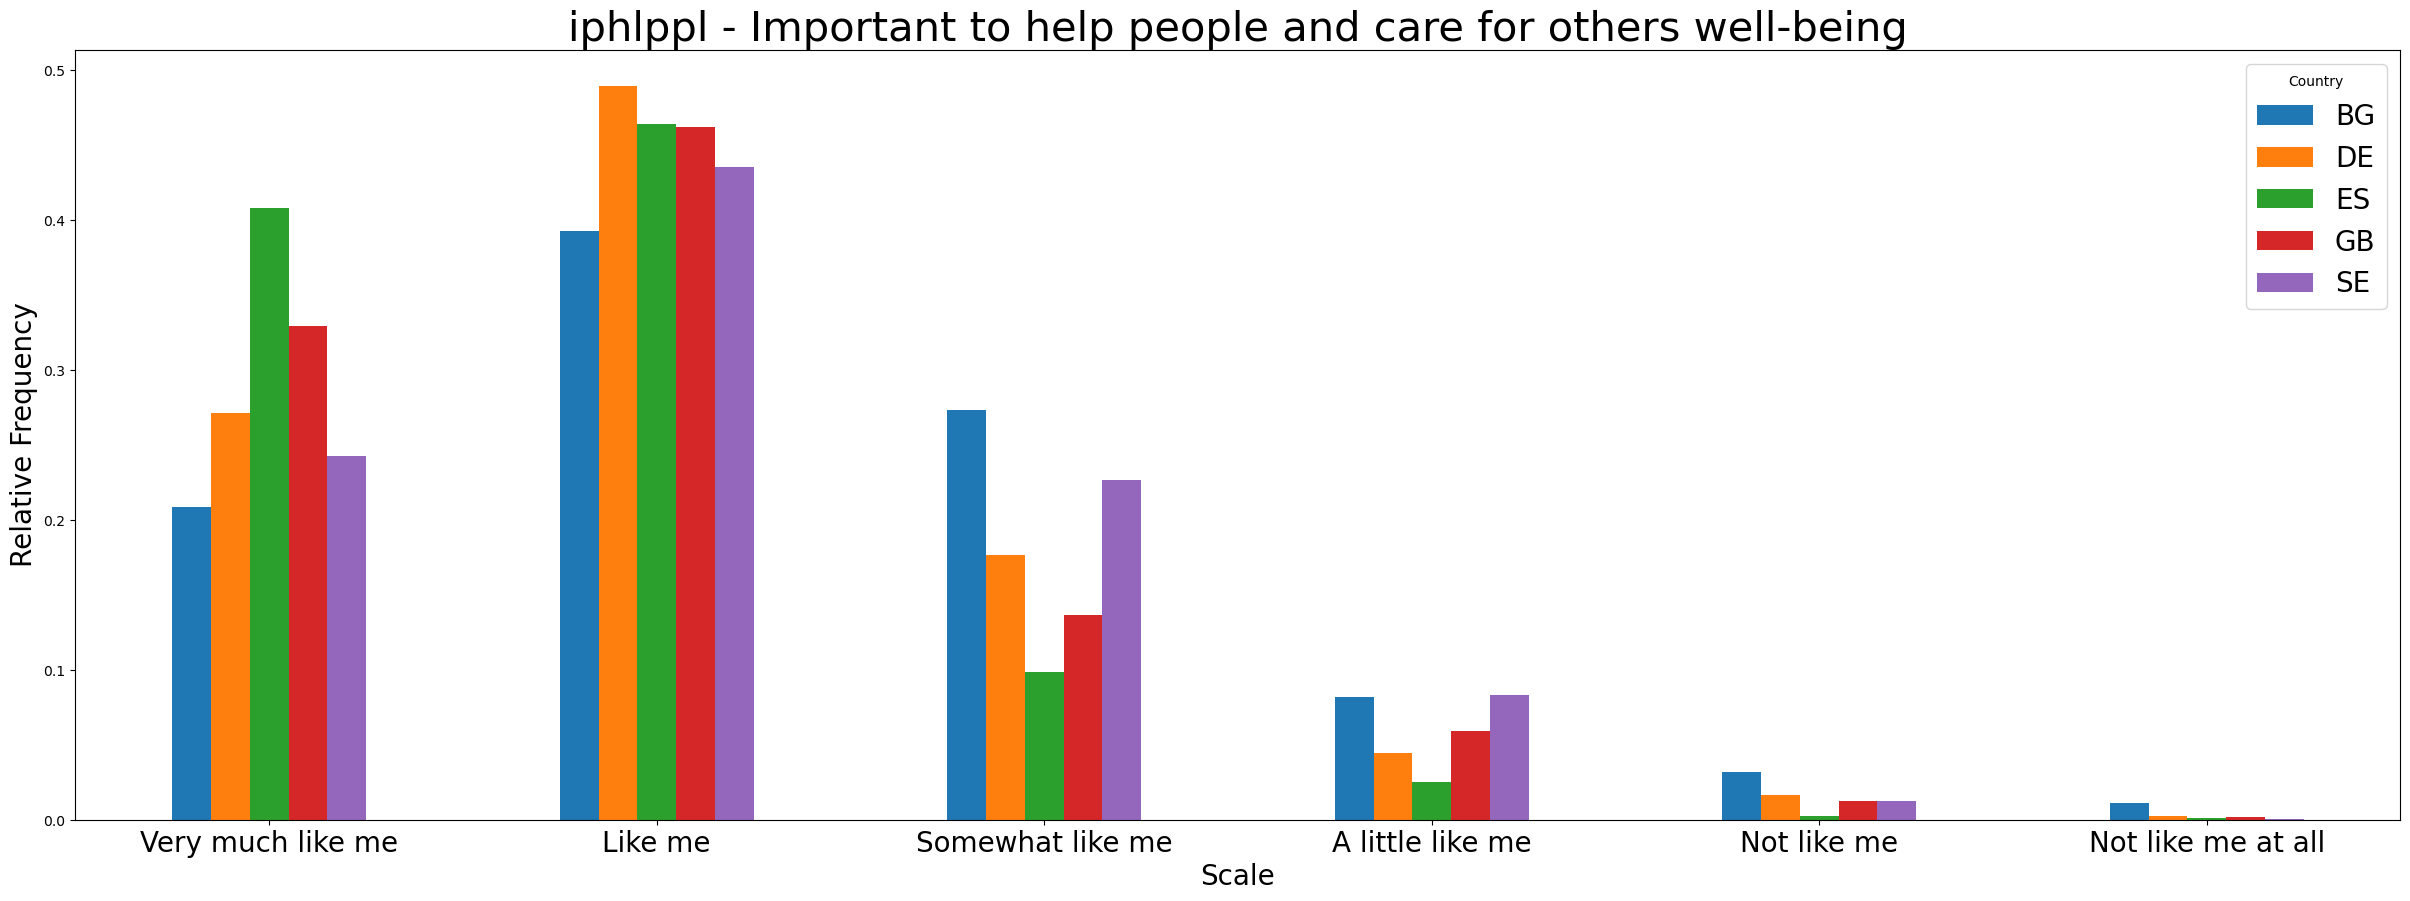

In [44]:
df.groupby("cntry")["iphlppl"].value_counts(normalize=True).unstack(0).plot.bar(figsize=(30, 10))
plt.title("iphlppl - Important to help people and care for others well-being", fontsize=30)
plt.xlabel("Scale", fontsize=20)
plt.xticks(np.arange(6), scala_values.values(), rotation=0, fontsize=20)
plt.ylabel("Relative Frequency", fontsize=20)
plt.legend(title="Country", fontsize=20)

plt.show()

## Horizontal stacked barplot

<Figure size 640x480 with 0 Axes>

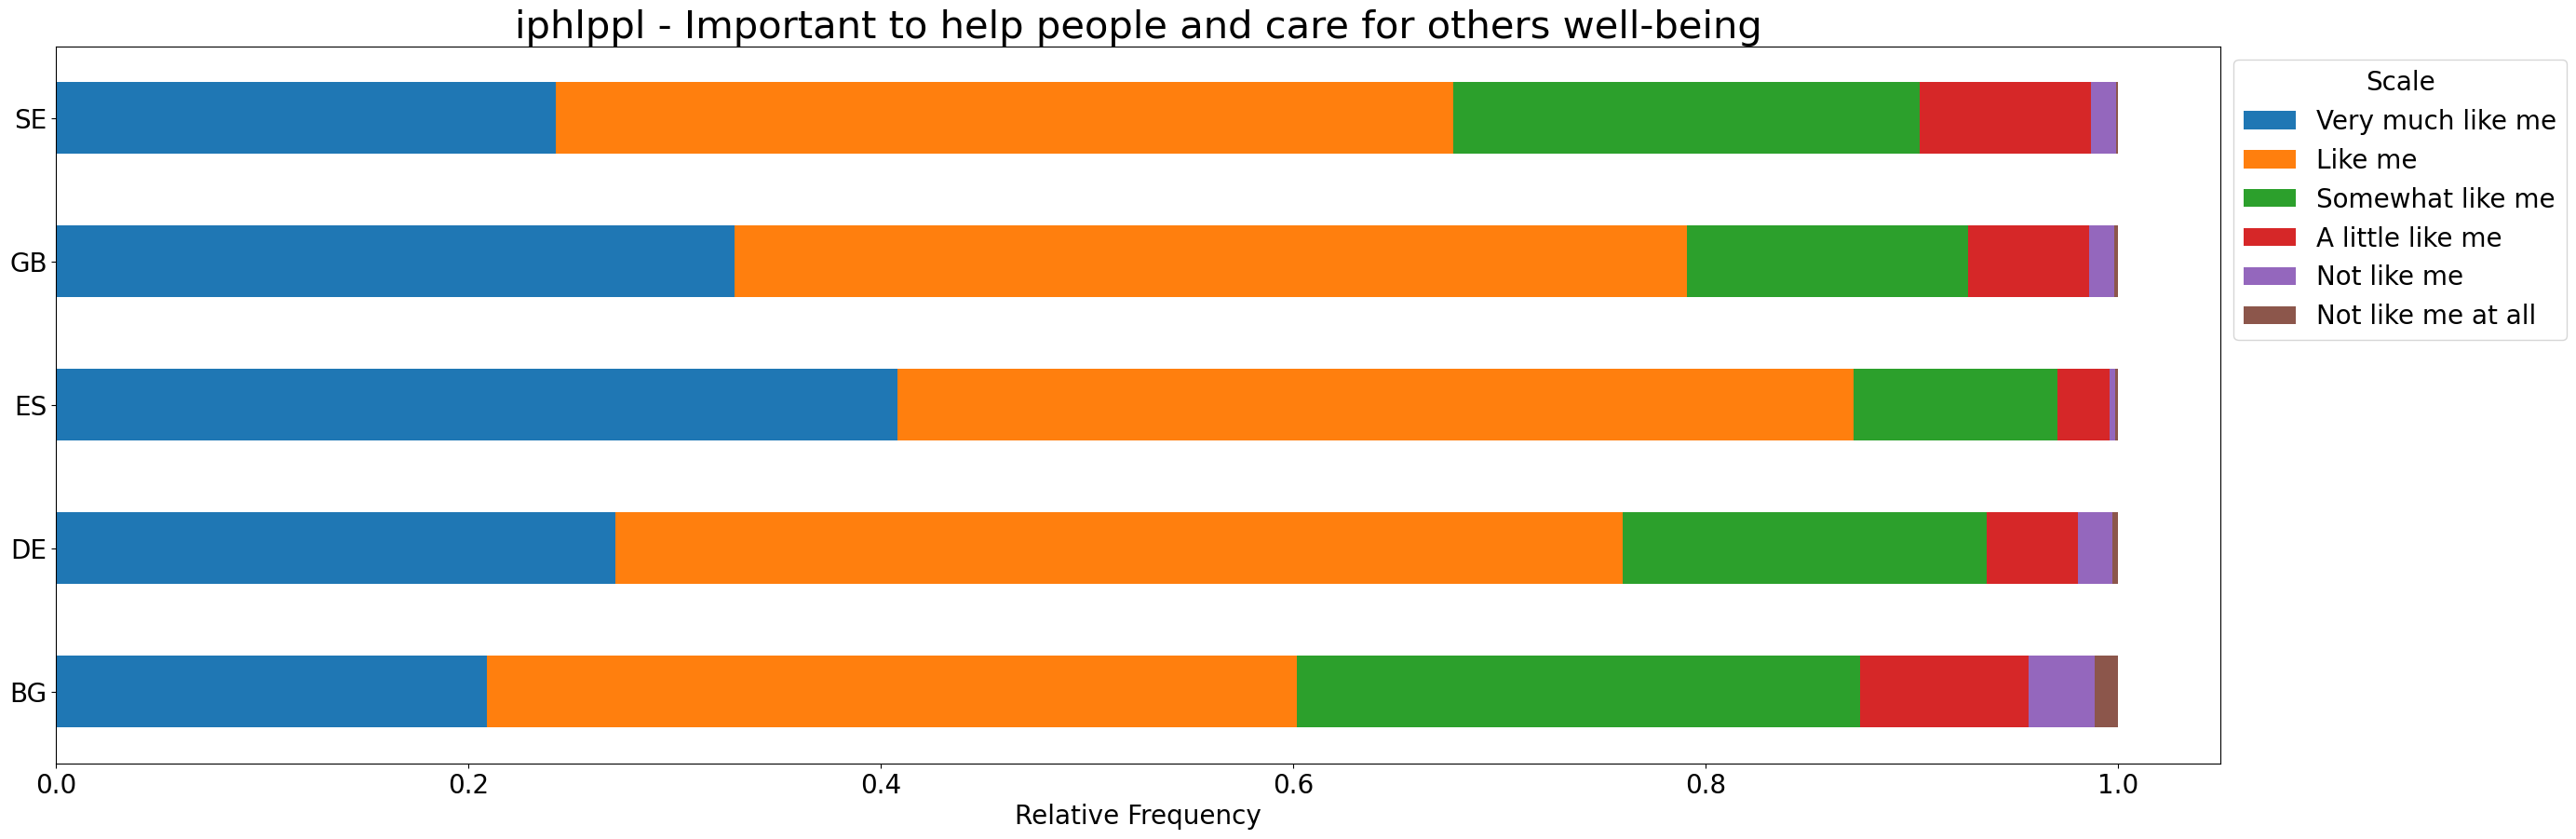

In [45]:
plt.clf()
df.groupby("cntry")["iphlppl"].value_counts(normalize=True).unstack(1).plot.barh(figsize=(30, 10), stacked=True)
plt.title("iphlppl - Important to help people and care for others well-being", fontsize=30)
plt.xlabel("Relative Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(list(scala_values.values()), fontsize=20, title="Scale", title_fontsize=20, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [46]:
import plotly.express as px
import plotly.graph_objects as go

scala_values = {
    1: "Very much like me",
    2: "Like me",
    3: "Somewhat like me",
    4: "A little like me",
    5: "Not like me",
    6: "Not like me at all"
}

df_grouped = df.groupby("cntry")["iphlppl"].value_counts(normalize=True).unstack(1)

fig = go.Figure()
for col in df_grouped.columns:
    fig.add_trace(go.Bar(
        y=df_grouped.index,
        x=df_grouped[col],
        name=scala_values[col],
        orientation='h'
    ))

fig.update_layout(
    title="iphlppl - Important to help people and care for others well-being",
    xaxis_title="Relative Frequency",
    yaxis_title="",
    legend=dict(
        title="Scale",
        title_font=dict(size=20),
        font=dict(size=20),
        x=1.1,
        y=1,
        orientation="v"
    ),
    height=600,
    width=900,
    barmode='stack'
)

fig.update_xaxes(tickfont=dict(size=20))
fig.update_yaxes(tickfont=dict(size=20))

fig.show()

## Horizontal stacked barplot before after

<Figure size 640x480 with 0 Axes>

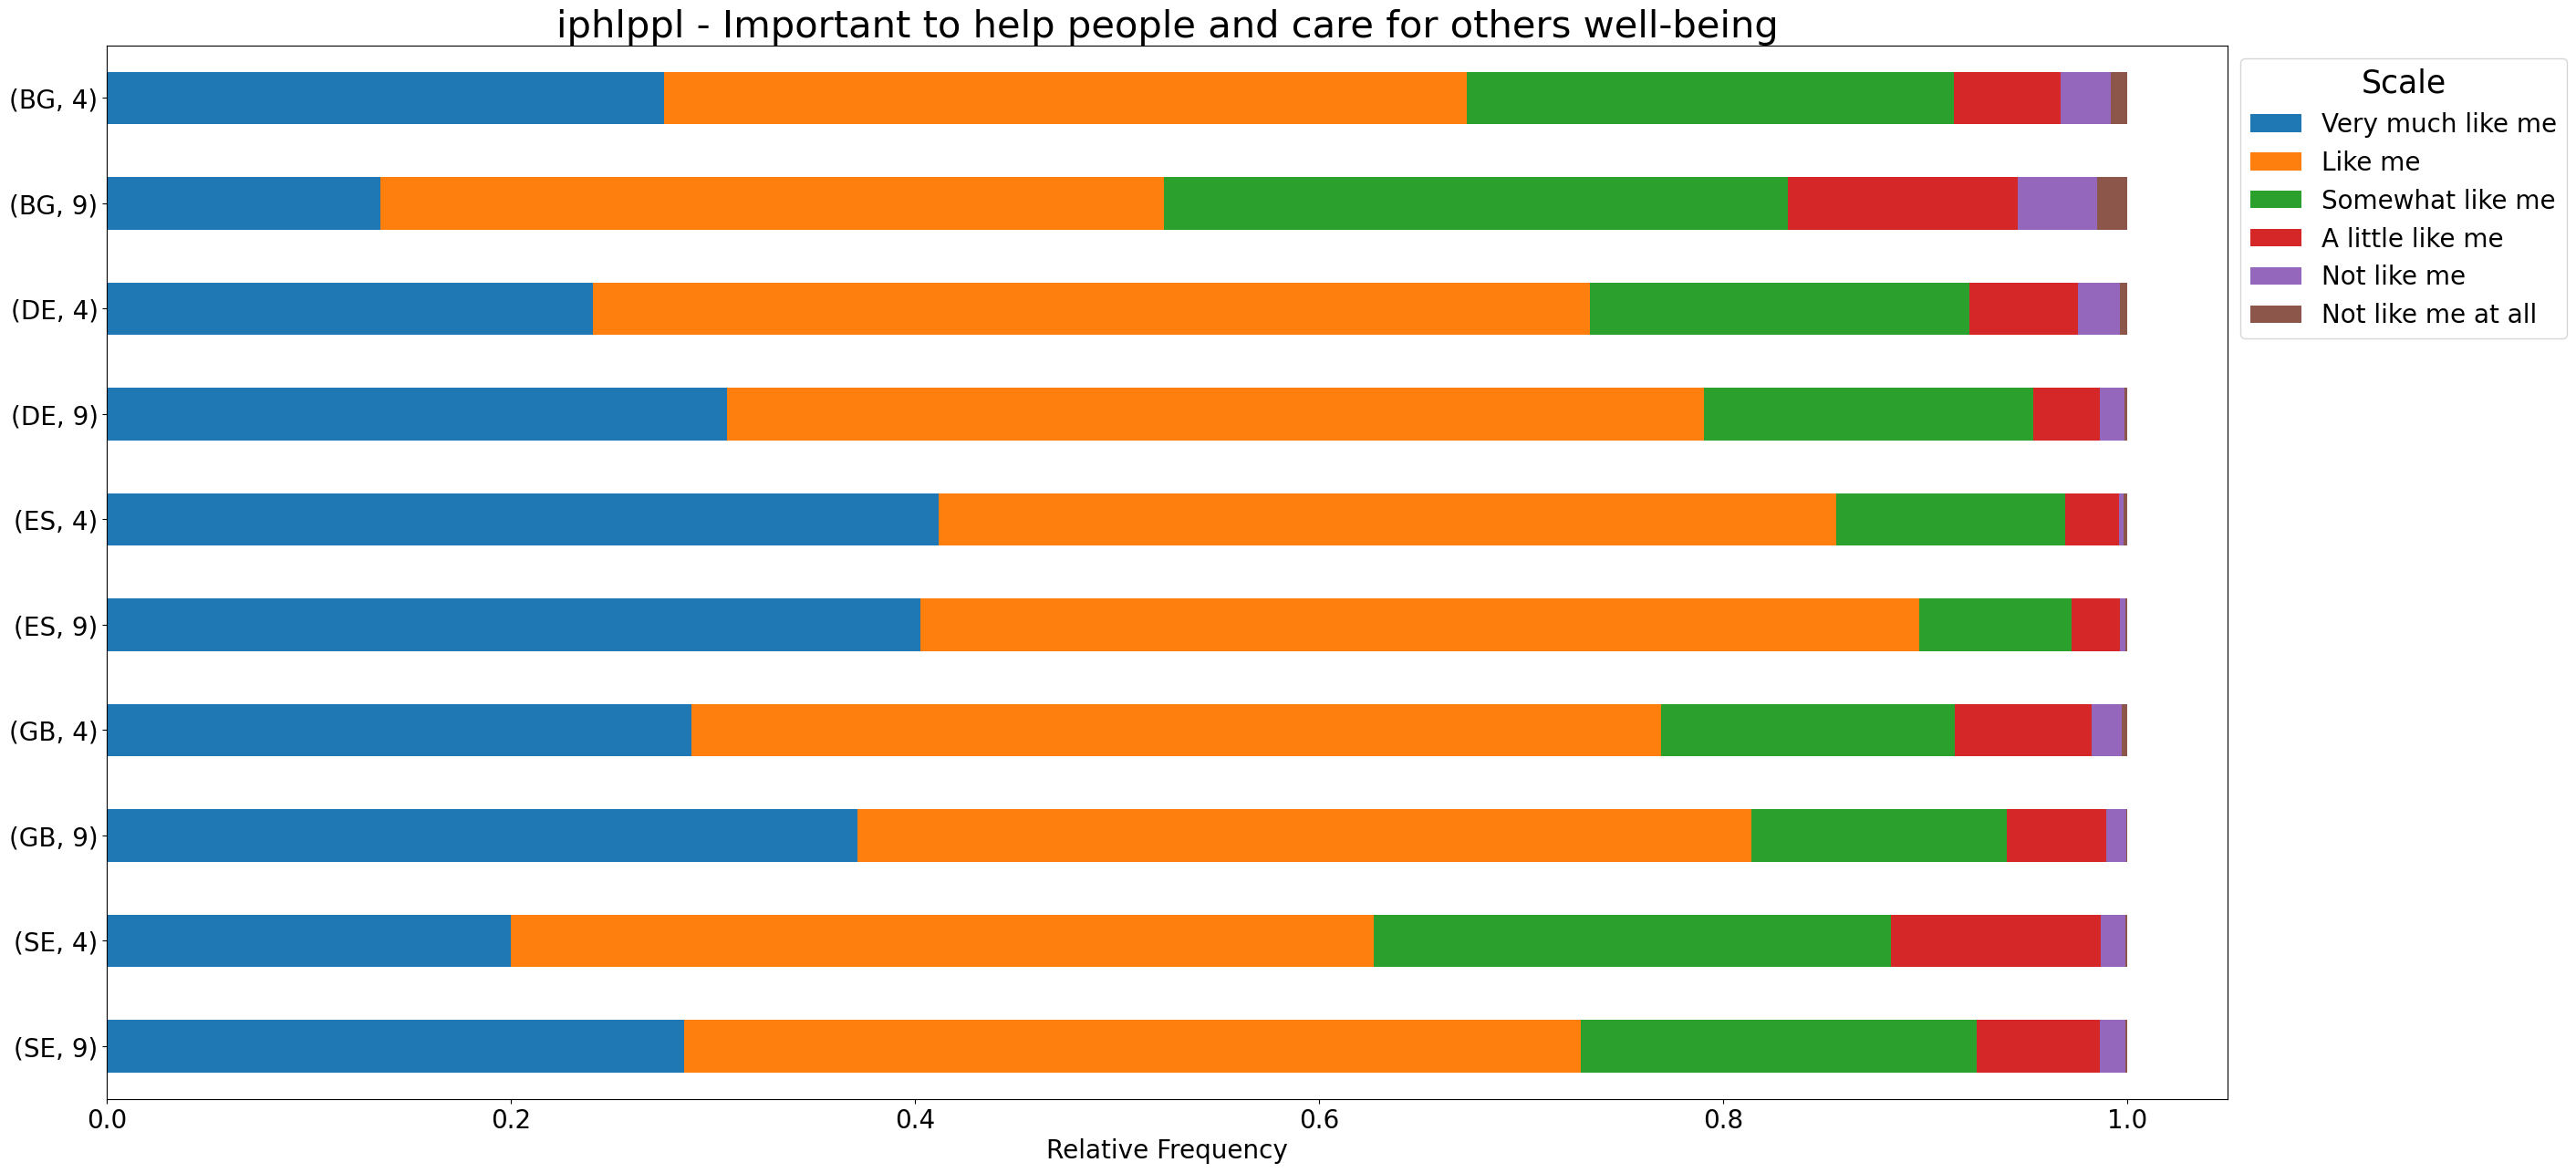

In [47]:
plt.clf()
df.groupby(["cntry", "essround"])["iphlppl"].value_counts(normalize=True).unstack(2).sort_index(ascending=False).plot.barh(figsize=(30, 15), stacked=True)
plt.title("iphlppl - Important to help people and care for others well-being", fontsize=30)
plt.xlabel("Relative Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(list(scala_values.values()), fontsize=20, title="Scale", title_fontsize=25, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [48]:
df.essround.value_counts()

4    11739
9     9967
Name: essround, dtype: int64

### Plotly

In [49]:
df_grouped.index.get_level_values(0)

Index(['BG', 'DE', 'ES', 'GB', 'SE'], dtype='object', name='cntry')

In [50]:
# import plotly.graph_objects as go
# import pandas as pd

# # Create the dataframe
# data = {
#     'iphlppl': ['BG', 'BG', 'DE', 'DE', 'ES', 'ES', 'GB', 'GB', 'SE', 'SE'],
#     'essround': [4, 9, 4, 9, 4, 9, 4, 9, 4, 9],
#     '1.0': [0.275591, 0.135273, 0.240511, 0.306901, 0.411673, 0.402803, 0.289292, 0.371507, 0.200128, 0.285620],
#     '2.0': [0.397406, 0.387953, 0.493796, 0.483498, 0.444358, 0.494211, 0.480138, 0.442510, 0.427197, 0.443931],
#     '3.0': [0.241315, 0.308831, 0.187591, 0.163309, 0.113619, 0.075564, 0.145509, 0.126432, 0.255933, 0.195910],
#     '4.0': [0.052802, 0.113834, 0.054015, 0.033005, 0.026459, 0.023766, 0.067789, 0.049473, 0.103913, 0.061346],
#     '5.0': [0.025012, 0.039306, 0.020803, 0.012002, 0.002335, 0.003047, 0.014680, 0.009620, 0.012187, 0.012533],
#     '6.0': [0.007874, 0.014803, 0.003285, 0.001286, 0.001556, 0.000609, 0.002591, 0.000458, 0.000641, 0.000660]
# }

# df = pd.DataFrame(data)
# # Create the stacked plot
# fig = go.Figure()

# # Generate colors based on scale values
# colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)', 'rgb(140, 86, 75)']

# for country_round in df.groupby(['iphlppl', 'essround']):
#     temp_df = country_round[1].melt(id_vars=['iphlppl', 'essround'], var_name='Values', value_name='Percentage')
#     fig.add_trace(go.Bar(
#         x=temp_df['Percentage'],
#         y=[f"{country_round[0][0]} {country_round[0][1]}"] * len(temp_df),
#         name=f"{country_round[0][0]} {country_round[0][1]}",
#         orientation='h',
#         marker=dict(
#             color=colors,
#         ),
#     ))

# # Set the layout
# fig.update_layout(
#     barmode='stack',
#     title='Horizontal Stacked Plot',
#     xaxis_title='Percentage',
#     yaxis_title='Country per Round',
# )

# # Show the plot
# fig.show()

In [51]:
df

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,prob,stratum,psu,impenv,imprich,ipeqopt,iphlppl,ipstrgv
0,ESS4e04_5,4,4.5,01.12.2018,11,BG,0.8285,1.115312,0.296719,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,1.0
1,ESS4e04_5,4,4.5,01.12.2018,13,BG,0.4143,0.557723,0.296719,NaN,NaN,NaN,NaN,1.0,4.0,3.0,1.0,2.0
2,ESS4e04_5,4,4.5,01.12.2018,15,BG,1.2428,1.734877,0.296719,NaN,NaN,NaN,NaN,1.0,3.0,1.0,3.0,1.0
3,ESS4e04_5,4,4.5,01.12.2018,16,BG,1.2428,1.688932,0.296719,NaN,NaN,NaN,NaN,2.0,3.0,2.0,2.0,2.0
4,ESS4e04_5,4,4.5,01.12.2018,17,BG,0.4143,0.557723,0.296719,NaN,NaN,NaN,NaN,2.0,6.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21701,ESS9e03_1,9,3.1,17.02.2021,69836,SE,1.0000,0.602229,0.540972,0.325789,0.00049,2836.0,24298.0,1.0,5.0,1.0,2.0,1.0
21702,ESS9e03_1,9,3.1,17.02.2021,69845,SE,1.0000,1.459512,0.540972,0.789555,0.00049,2830.0,23865.0,5.0,4.0,2.0,1.0,1.0
21703,ESS9e03_1,9,3.1,17.02.2021,69882,SE,1.0000,0.960054,0.540972,0.519362,0.00049,2833.0,23534.0,1.0,5.0,1.0,2.0,2.0
21704,ESS9e03_1,9,3.1,17.02.2021,69908,SE,1.0000,0.940854,0.540972,0.508976,0.00049,2831.0,23782.0,4.0,5.0,2.0,3.0,2.0


In [52]:
df_grouped = df.groupby(["cntry", "essround"])["iphlppl"].value_counts(normalize=True).unstack(2)

In [53]:
df_grouped

iphlppl              1.0       2.0       3.0       4.0       5.0       6.0
cntry essround                                                            
BG    4         0.275591  0.397406  0.241315  0.052802  0.025012  0.007874
      9         0.135273  0.387953  0.308831  0.113834  0.039306  0.014803
DE    4         0.240511  0.493796  0.187591  0.054015  0.020803  0.003285
      9         0.306901  0.483498  0.163309  0.033005  0.012002  0.001286
ES    4         0.411673  0.444358  0.113619  0.026459  0.002335  0.001556
      9         0.402803  0.494211  0.075564  0.023766  0.003047  0.000609
GB    4         0.289292  0.480138  0.145509  0.067789  0.014680  0.002591
      9         0.371507  0.442510  0.126432  0.049473  0.009620  0.000458
SE    4         0.200128  0.427197  0.255933  0.103913  0.012187  0.000641
      9         0.285620  0.443931  0.195910  0.061346  0.012533  0.000660

In [60]:
import plotly.graph_objects as go
import pandas as pd

# # Create the dataframe
# data = {
#     'iphlppl': ['BG', 'BG', 'DE', 'DE', 'ES', 'ES', 'GB', 'GB', 'SE', 'SE'],
#     'essround': [4, 9, 4, 9, 4, 9, 4, 9, 4, 9],
#     '1.0': [0.275591, 0.135273, 0.240511, 0.306901, 0.411673, 0.402803, 0.289292, 0.371507, 0.200128, 0.285620],
#     '2.0': [0.397406, 0.387953, 0.493796, 0.483498, 0.444358, 0.494211, 0.480138, 0.442510, 0.427197, 0.443931],
#     '3.0': [0.241315, 0.308831, 0.187591, 0.163309, 0.113619, 0.075564, 0.145509, 0.126432, 0.255933, 0.195910],
#     '4.0': [0.052802, 0.113834, 0.054015, 0.033005, 0.026459, 0.023766, 0.067789, 0.049473, 0.103913, 0.061346],
#     '5.0': [0.025012, 0.039306, 0.020803, 0.012002, 0.002335, 0.003047, 0.014680, 0.009620, 0.012187, 0.012533],
#     '6.0': [0.007874, 0.014803, 0.003285, 0.001286, 0.001556, 0.000609, 0.002591, 0.000458, 0.000641, 0.000660]
# }

# df = pd.DataFrame(data)

df_grouped = df.groupby(["iphlppl", "essround"])["cntry"].value_counts(normalize=True).unstack(2)

# Create the stacked plot
fig = go.Figure()

for country_round in df_grouped:
    print(country_round)
    #temp_df = country_round[1].melt(id_vars=['iphlppl', 'essround'], var_name='Values', value_name='Percentage')
    print(temp_df)
    fig.add_trace(go.Bar(
        x=temp_df['Percentage'],
        y=[f"{country_round[0][0]} {country_round[0][1]}"] * len(temp_df),
        name=f"{country_round[0][0]} {country_round[0][1]}",
        orientation='h'
    ))

# Set the layout
fig.update_layout(
    barmode='stack',
    title='Horizontal Stacked Plot',
    xaxis_title='Percentage',
    yaxis_title='Country per Round',
)

# Show the plot
#fig.show()


BG
     iphlppl  essround   Values Percentage
0        6.0         9     name  ESS9e03_1
1        6.0         9     name  ESS9e03_1
2        6.0         9     name  ESS9e03_1
3        6.0         9     name  ESS9e03_1
4        6.0         9     name  ESS9e03_1
..       ...       ...      ...        ...
555      6.0         9  ipstrgv        2.0
556      6.0         9  ipstrgv        5.0
557      6.0         9  ipstrgv        1.0
558      6.0         9  ipstrgv        4.0
559      6.0         9  ipstrgv        NaN

[560 rows x 4 columns]


IndexError: string index out of range

In [62]:
df_grouped.melt(id_vars=['iphlppl', 'essround'], var_name='Values', value_name='Percentage')

KeyError: "The following 'id_vars' are not present in the DataFrame: ['essround', 'iphlppl']"

In [ ]:
#df_grouped melt into cntry, essround, 1,2,3,4,5,6

df_grouped = df.groupby(["iphlppl", "essround"])["cntry"].value_counts(normalize=True).unstack(2)

#melt
df_grouped = df_grouped.reset_index().melt(id_vars=["iphlppl", "essround"], var_name="cntry", value_name="Percentage")

In [ ]:
df_grouped

,iphlppl,essround,cntry,Percentage
0,1.0,4,BG,0.180631
1,1.0,9,BG,0.091823
2,2.0,4,BG,0.167219
3,2.0,9,BG,0.175196
4,3.0,4,BG,0.252545
5,3.0,9,BG,0.359477
6,4.0,4,BG,0.175655
7,4.0,9,BG,0.412963
8,5.0,4,BG,0.317647
9,5.0,9,BG,0.513333
